# Extracción de datos web

## Índice
1. [Navegador web en Python (socket)](#socket)
2. [Recepción de páginas web con urllib](#urllib)
3. [Parsing de HTML mediante BeatifulSoup](#bea)
4. [Ejemplos de web scraping](#ejemplos)
5. [Web scraping con selenium](#sele)

<a id="socket"></a>
## Navegador web en Python (socket)

Vamos a crear nuestro primer navegador web utilizando el protocolo HTTP, realizando una conexión a un servidor web siguiendo las reglas de este protocolo para solicitar un documento y mostrar lo que el servidor nos devuelve. El documento al que accederemos se encuentra en la página web http://data.pr4e.org/romeo.txt

In [1]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')

mysock.close()

HTTP/1.1 200 OK
Date: Sat, 09 Sep 2023 15:44:35 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


Primero, el programa realiza una conexión al puerto 80 del servidor. Como nuestro programa está asumiendo el rol de "navegador web", el protocolo HTTP nos dice que tenemos que enviar el comando GET seguido por una línea en blanco. `\r\n` significa un final de línea, y `\r\n\r\n` es el equivalente a la línea en blanco.

<a id="urllib"></a>
## Recepción de páginas web con urllib

Cuando el programa se ejecuta, en su salida sólo vemos el contenido del fichero. Las cabeceras siguen enviándose, pero el código de `urllib` se queda con ella y sólo nos devuelve los datos. Una vez abierta la página web, se puede leer como si fuese un archivo local.  
¿Qué ocurre si cambiamos el txt por otra página web?

Puede ocurrir que urllib devuelva un error de fallo en la verificación del certificado SSL:  

`urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed`

SSL (*Secure Sockets Layer*) es un certificado que asegura que una página web es de confianza. 

Para ignorar la autenticación de certificado SSL no verificado en urllib tenemos dos opciones:

In [5]:
import ssl
import urllib.request
context = ssl._create_unverified_context()

print(urllib.request.urlopen('http://data.pr4e.org/romeo.txt',context=context).read().decode())

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief



In [6]:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context
print(urllib.request.urlopen('https://www.elpais.com').read().decode())

<!DOCTYPE html><html lang="es-ES"><head><link rel="preconnect" href="//static.elpais.com"/><link rel="preconnect" href="//ep00.epimg.net"/><link rel="preconnect" href="//imagenes.elpais.com"/><link rel="preconnect" href="//www.googletagservices.com"/><link rel="preconnect" href="//ping.chartbeat.net"/><link rel="preconnect" href="//cdn.krxd.net"/><link rel="preconnect" href="//assets.adobedtm.com"/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Roman.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/marcin-ant-b/marcinantb-regular-webfont.woff2" as="font" type="font/woff2" crossorigin=""/><link rel="preload" href="https://static.elpais.com/dist/resources/fonts/majrit/majrit-text/Majrit-Text-Bold-Ital

<a id="bea"></a>
## Parsing de HTML mediante BeatifulSoup

BeautifulSoup es una librería de Python que permite analizar documentos HTML y extraer datos de ellos, compensando imperfecciones que puedan existir. Para instalar esta librería escribimos en anaconda Prompt:  
`conda install -c anaconda beautifulsoup4`

Esta librería permite, por ejemplo, extraer los atributos href de las etiquetas de anclaje (a)  
<img src='http://www.cellbiol.com/bioinformatics_web_development/wp-content/uploads/2017/01/attributes_and_values_in_the_a_tag.png'>  
En el siguiente ejemplo, vamos a parsear una entrada HTML y extraer los links utilizando la librería BeautifulSoup. 
Utilizaremos urllib para leer la página y después BeautifulSoup para extraer los atributos href de las etiquetas de tipo ancla (a)

In [2]:
import urllib.request
from bs4 import BeautifulSoup
url = input('Introduce URL: ')
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)


In [9]:
# lo que hacemos es buscar en el codigo html, todas las etiquetas con hipervinculos, las cuales comienza con <a>
for tag in soup('a'): 
    print(tag)

<a href="https://elpais.com"><span>España</span></a>
<a href="https://elpais.com/america/"><span>América</span></a>
<a href="https://elpais.com/mexico/"><span>México</span></a>
<a href="https://elpais.com/america-colombia/"><span>Colombia</span></a>
<a href="https://elpais.com/chile/"><span>Chile</span></a>
<a href="https://elpais.com/argentina/"><span>Argentina</span></a>
<a href="https://english.elpais.com"><span>USA</span></a>
<a class="ep_e _db" data-dtm-region="header_areausuario" href="https://elpais.com"><img alt="EL PAÍS" class="ep_i" height="34" src="https://static.elpais.com/dist/resources/images/logos/primary/el-pais.svg" width="147"/><img alt="El periódico global" class="ep_sl _dn" height="12" src="https://static.elpais.com/dist/resources/images/logos/primary/el-pais-slogan-esp.svg" width="127"/></a>
<a class="button | flex btn btn-xs btn-2" data-ctn-subscription="" data-link-am="https://elpais.com/suscripciones/america/#/campaign#?prod=SUSDIGAM&amp;o=botonam_cab&amp;prm=su

In [11]:
for tag in soup('a'):
    print('Raw:', tag)
    print('URL', tag.get('href'))
    print('Contenido', tag.contents)
    print('Atributos', tag.attrs)
    print('\n')

Raw: <a href="https://elpais.com"><span>España</span></a>
URL https://elpais.com
Contenido [<span>España</span>]
Atributos {'href': 'https://elpais.com'}


Raw: <a href="https://elpais.com/america/"><span>América</span></a>
URL https://elpais.com/america/
Contenido [<span>América</span>]
Atributos {'href': 'https://elpais.com/america/'}


Raw: <a href="https://elpais.com/mexico/"><span>México</span></a>
URL https://elpais.com/mexico/
Contenido [<span>México</span>]
Atributos {'href': 'https://elpais.com/mexico/'}


Raw: <a href="https://elpais.com/america-colombia/"><span>Colombia</span></a>
URL https://elpais.com/america-colombia/
Contenido [<span>Colombia</span>]
Atributos {'href': 'https://elpais.com/america-colombia/'}


Raw: <a href="https://elpais.com/chile/"><span>Chile</span></a>
URL https://elpais.com/chile/
Contenido [<span>Chile</span>]
Atributos {'href': 'https://elpais.com/chile/'}


Raw: <a href="https://elpais.com/argentina/"><span>Argentina</span></a>
URL https://elpais

Podemos extraer más campos de las etiquetas

Puedes encontrar la documentación de beautifulsoup en https://www.crummy.com/software/BeautifulSoup/bs4/doc/

<a id="ejemplos"></a>
## Ejemplos de web scraping

### 1. Frecuencia de las palabras de un discurso  
Vamos a obtener la frecuencia de las palabras del siguiente discurso: https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

soup('p')



[<p class="">Señor presidente de la Cámara de Representantes, señor vicepresidente, miembros del Congreso, primera dama de Estados Unidos, compatriotas estadounidenses:</p>,
 <p class="">Ha transcurrido menos de un año desde que subí por primera vez a la tribuna de esta solemne cámara para hablar en nombre del pueblo estadounidense y referirme a sus preocupaciones, sus esperanzas y sus sueños. Aquella noche, nuestro Gobierno ya había tomado medidas inmediatas. Una nueva oleada de optimismo recorría el país.</p>,
 <p class="">Desde entonces no ha habido día en que no hayamos seguido adelante con una visión clara y una misión justa: volver a hacer Estados Unidos grande para todos los estadounidenses.</p>,
 <p class="">A lo largo de este último año, hemos realizado avances increíbles y hemos obtenido resultados extraordinarios. Hemos hecho frente a retos que preveíamos y a otros que jamás habríamos podido imaginar. Hemos compartido las más altas cotas de la victoria y el dolor de la adver

In [91]:
''' lo que ocurre es que dentro de una de las etitquetas <p> existe otra etiqueta
<a> entonces al extraer el conetenido de esa etiqueta, nos metemos en otra y no en un string

'''

for tag in soup('p'):
    if (tag.attrs == {'class': []}) == True:

        print(tag.contents[0])
        print(tag.attrs)
        print(len(tag.attrs))
        print('\n')



Señor presidente de la Cámara de Representantes, señor vicepresidente, miembros del Congreso, primera dama de Estados Unidos, compatriotas estadounidenses:
{'class': []}
1


Ha transcurrido menos de un año desde que subí por primera vez a la tribuna de esta solemne cámara para hablar en nombre del pueblo estadounidense y referirme a sus preocupaciones, sus esperanzas y sus sueños. Aquella noche, nuestro Gobierno ya había tomado medidas inmediatas. Una nueva oleada de optimismo recorría el país.
{'class': []}
1


Desde entonces no ha habido día en que no hayamos seguido adelante con una visión clara y una misión justa: volver a hacer Estados Unidos grande para todos los estadounidenses.
{'class': []}
1


A lo largo de este último año, hemos realizado avances increíbles y hemos obtenido resultados extraordinarios. Hemos hecho frente a retos que preveíamos y a otros que jamás habríamos podido imaginar. Hemos compartido las más altas cotas de la victoria y el dolor de la adversidad. Hemos 

In [90]:
len(soup('p')[0].attrs)

1

In [131]:
discurso = ''
for tag in soup('p'):
    if (tag.attrs == {'class': []}) == True:
        discurso = discurso + tag.contents[0]

discurso


False

In [96]:
discurso.replace(',','').replace('.','').split()

['Señor',
 'presidente',
 'de',
 'la',
 'Cámara',
 'de',
 'Representantes',
 'señor',
 'vicepresidente',
 'miembros',
 'del',
 'Congreso',
 'primera',
 'dama',
 'de',
 'Estados',
 'Unidos',
 'compatriotas',
 'estadounidenses:Ha',
 'transcurrido',
 'menos',
 'de',
 'un',
 'año',
 'desde',
 'que',
 'subí',
 'por',
 'primera',
 'vez',
 'a',
 'la',
 'tribuna',
 'de',
 'esta',
 'solemne',
 'cámara',
 'para',
 'hablar',
 'en',
 'nombre',
 'del',
 'pueblo',
 'estadounidense',
 'y',
 'referirme',
 'a',
 'sus',
 'preocupaciones',
 'sus',
 'esperanzas',
 'y',
 'sus',
 'sueños',
 'Aquella',
 'noche',
 'nuestro',
 'Gobierno',
 'ya',
 'había',
 'tomado',
 'medidas',
 'inmediatas',
 'Una',
 'nueva',
 'oleada',
 'de',
 'optimismo',
 'recorría',
 'el',
 'paísDesde',
 'entonces',
 'no',
 'ha',
 'habido',
 'día',
 'en',
 'que',
 'no',
 'hayamos',
 'seguido',
 'adelante',
 'con',
 'una',
 'visión',
 'clara',
 'y',
 'una',
 'misión',
 'justa:',
 'volver',
 'a',
 'hacer',
 'Estados',
 'Unidos',
 'grande',


In [133]:

dicc = {}
palabras = discurso.replace(',',' ').replace('.',' ').replace('?',' ').lower().split()
palabras

for palabra in palabras:
    if len(palabra) > 5:
      dicc[palabra] = dicc.get(palabra,0) + 1 

dicc

import pandas as pd
df = pd.DataFrame(list(dicc.items()),columns=['palabra','contador'])
df.sort_values('contador',ascending=False)

,palabra,contador
41,estadounidenses,32
23,nuestro,28
390,nuestros,28
245,nuestra,27
8,unidos,27
...,...,...
591,intelectual,1
593,aplicación,1
595,reconstruimos,1
596,industrias,1


In [105]:
''' hay cosas escritas de forma predeterminada que no sirven para mi version de python'''
import urllib.request
from bs4 import BeautifulSoup

url = 'https://elpais.com/internacional/2018/01/31/actualidad/1517387619_036241.html'

html = urllib.request.urlopen(url)
soup2 = BeautifulSoup(html)

tags = soup2('p')

discurso = ''

for tag in tags:
    if len(tag.attrs)>0 and list(tag.attrs.keys())[0]=='class' and len(list(tag.attrs.values())[0])==0:
        a = tag.contents[0]
        discurso = discurso +a
    else:
        None#print(tag)

contadores = dict() # Creo un diccionario para almacenar las palabras y contar las veces que aparecen

discurso = discurso.replace(',',' ').replace('.',' ').replace(':',' ').replace('?',' ')
palabras = discurso.lower().split()

for palabra in palabras:
    if len(palabra)>3 and palabra not in ['esta','para','este','estos','esos']:
        contadores[palabra] = contadores.get(palabra,0) + 1
        
import pandas as pd
df = pd.DataFrame(list(contadores.items()),columns=['palabra','contador'])
df.sort_values('contador',ascending=False)

TypeError: 'dict' object is not callable

### 2. Web Scraping de bitcoin
Extraemos el valor más reciente de Bitcoin en https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin

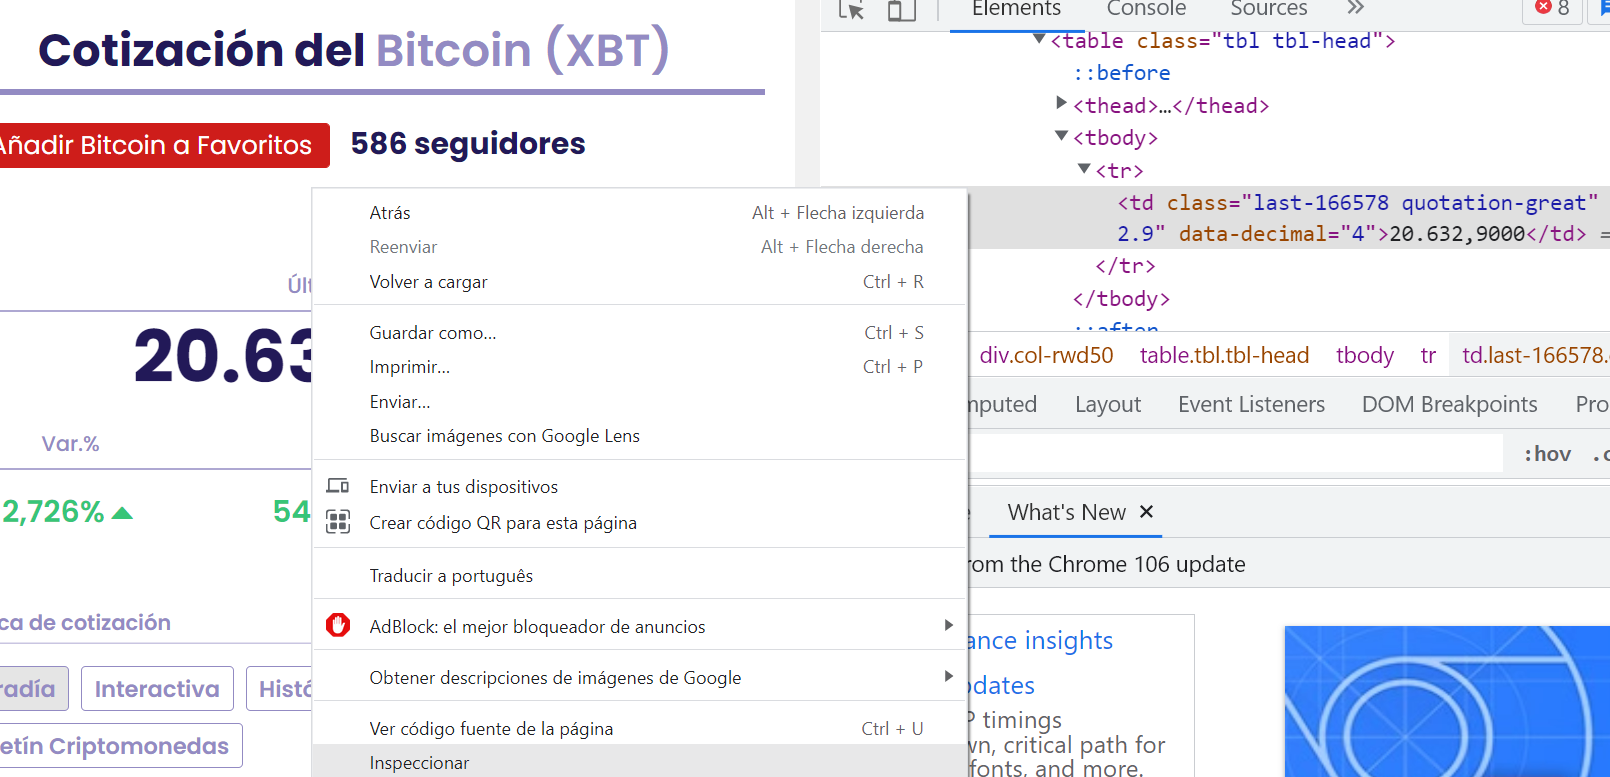

In [143]:
import urllib.request
from bs4 import BeautifulSoup

url = 'https://www.estrategiasdeinversion.com/cotizaciones/criptomonedas/bitcoin'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)

tags = soup.find_all('td', class_='last-166578 quotation-great')
float(tags[0].text.replace('.','').replace(',','.'))

25820.4

### 3. Web scraping con pandas 

La función `read_html()` de pandas también permite extraer tablas de páginas web, devolviendo una lista de dataframes con todas las tablas que existan.  
Por ejemplo, vamos a hacer scraping de la siguiente tabla: http://www.fdic.gov/bank/individual/failed/banklist.html  

Es necesario instalar la librería `lxml`: `conda install -c conda-forge lxml`

In [4]:
import pandas as pd
import lxml
import html5lib
url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'

tablas = pd.read_html(url)
tablas[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.","July 28, 2023",10544
1,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.","May 1, 2023",10543
2,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.","March 12, 2023",10540
3,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,"March 10, 2023",10539
4,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
...,...,...,...,...,...,...,...
562,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
563,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
564,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
565,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


## <span style="color:red">Do it yourself</span>

Obtén los equipos que hayan ganado LaLiga en los últimos 4 años con su puntuación a partir de la siguiente URL: https://resultados.as.com/resultados/futbol/primera/2019_2020/clasificacion/  

| Temporada | Club        | Puntos |
|-----------|-------------|--------|
| 19/20     | Real Madrid | 87     |
| 18/19     | Barcelona   | 87     |
| ...       | ...         | ...    |